In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../../Data/Imputed.csv",dtype={"PUMA":"str"})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246502 entries, 0 to 246501
Data columns (total 68 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   HINCP_x   246502 non-null  float64
 1   SMOCP     246502 non-null  float64
 2   PUMA      246502 non-null  object 
 3   NP        246502 non-null  float64
 4   BDSP      246502 non-null  float64
 5   INSP      246502 non-null  float64
 6   RMSP      246502 non-null  float64
 7   VALP      246502 non-null  float64
 8   TAXAMT    246502 non-null  float64
 9   ACR_1.0   246502 non-null  float64
 10  ACR_1.2   246502 non-null  float64
 11  ACR_1.4   246502 non-null  float64
 12  ACR_1.6   246502 non-null  float64
 13  ACR_1.8   246502 non-null  float64
 14  ACR_2.0   246502 non-null  float64
 15  ACR_2.2   246502 non-null  float64
 16  ACR_2.4   246502 non-null  float64
 17  ACR_2.6   246502 non-null  float64
 18  ACR_3.0   246502 non-null  float64
 19  BUS_1.0   246502 non-null  float64
 20  BUS_

In [5]:
income_bin_freq=pd.DataFrame([
    {"bin_name":"Poverty","count":sum(df["HINCP_x"]<48500)},
    {"bin_name":"Middleclass","count":sum((df["HINCP_x"] >= 48500) & (df["HINCP_x"] <= 145000))},
    {"bin_name":"Upper Class","count":sum(df["HINCP_x"] > 145500)}
   
])

In [6]:
income_bin_freq

,bin_name,count
0,Poverty,96027
1,Middleclass,114759
2,Upper Class,35563


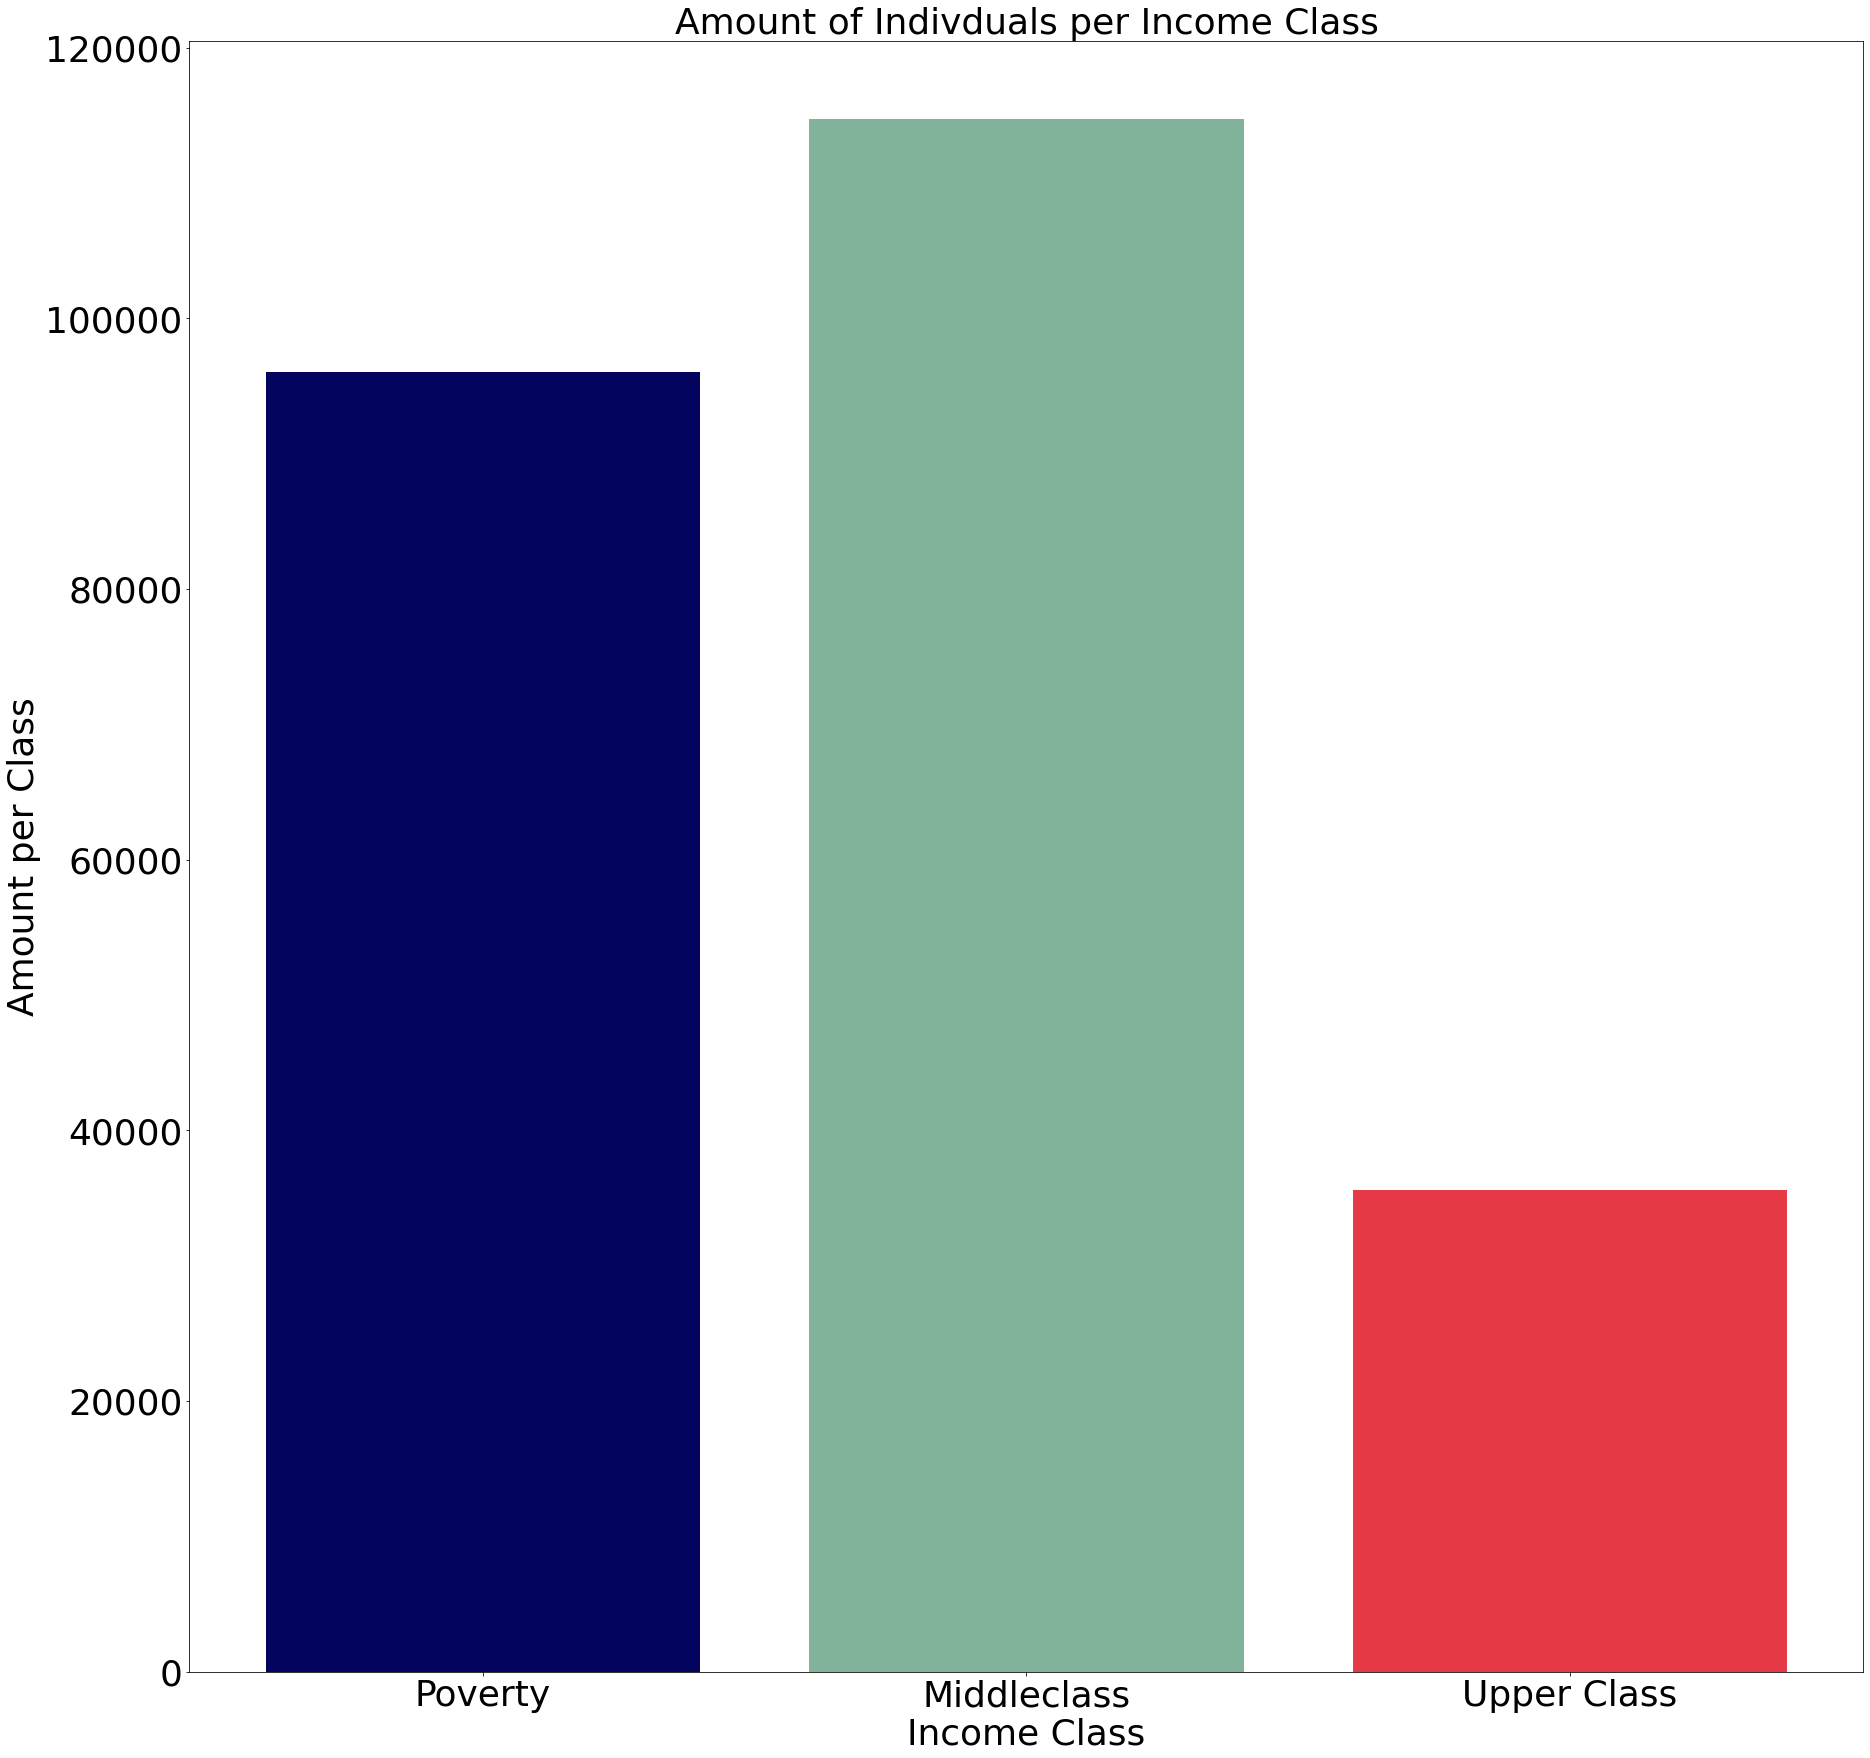

In [7]:
fig, ax = plt.subplots(figsize=((30,30)))
plt.bar(income_bin_freq["bin_name"],income_bin_freq["count"],color=["#03045e","#81b29a","#e63946"])
plt.xlabel("Income Class",fontsize=36)
plt.ylabel("Amount per Class",fontsize=36)
plt.tick_params(axis="both",labelsize=36)
plt.title("Amount of Indivduals per Income Class",fontsize=36)
# plt.legend()
plt.savefig("../../Reports/Figures/Income_plot",transparent=True,bbox_inches="tight", pad_inches=.2)


From this we can see the data is not completly income with low values or in the poverty class. We do have some high values of income around 10% or so.

In [8]:
tax_bin_freq=pd.DataFrame([
    {"bin_name":"10%","count":sum(df["HINCP_x"]<13600)},
    {"bin_name":"12%","count":sum((df["HINCP_x"] >= 13600) & (df["HINCP_x"] <= 51800))},
    {"bin_name":"22%","count":sum((df["HINCP_x"] >= 51800) & (df["HINCP_x"] <= 82500))},
    {"bin_name":"24%","count":sum((df["HINCP_x"] >= 82500) & (df["HINCP_x"] <= 157500))},
    {"bin_name":"32%","count":sum((df["HINCP_x"] >= 157500) & (df["HINCP_x"] <= 200000))},
    {"bin_name":"35%","count":sum((df["HINCP_x"] >= 200000) & (df["HINCP_x"] <= 500000))},
    {"bin_name":"37%","count":sum(df["HINCP_x"] > 500000)}
   
])

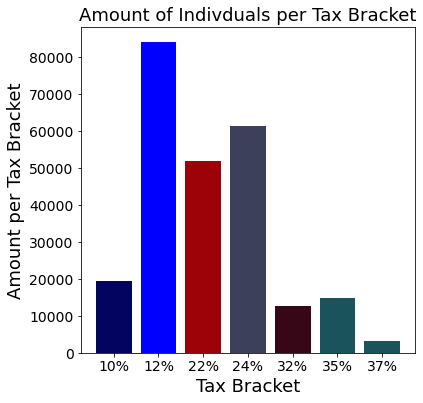

In [9]:
fig, ax = plt.subplots(figsize=((6,6)))
plt.xlabel("Tax Bracket",fontsize=18)
plt.ylabel("Amount per Tax Bracket",fontsize=18)
plt.tick_params(axis="both",labelsize=14)
plt.title("Amount of Indivduals per Tax Bracket",fontsize=18)
# plt.legend()
plt.bar(tax_bin_freq["bin_name"],tax_bin_freq["count"],color=["#03045e","blue","#9d0208","#3d405b","#370617","#1a535c","#1a535c"]);
plt.savefig("../../Reports/Figures/Tax_plot",transparent=True,bbox_inches="tight",pad_inches=.2)


Howver when you look in terms of tax brackers we can see that majorty of our daya is within  the 12% braket meaning income between ~13k to ~52k. This makes sense due to that being  a large income range most individuals would fall into.

In [10]:
# models=pd.DataFrame([
#     {"Model":["Linear Regression","KNN Regressor","Random Forest Regressor","Neural Network"]},
#     {"R-Squared value":[.38,.30,.39,.34]}
   
# ])
models=pd.DataFrame([
    {"bin_name":"Linear Regression","count":.38},
    {"bin_name":"KNN Regressor","count":.30},
    {"bin_name":"Random Forest Regrssor","count":.39},
    {"bin_name":"Neural Network","count":.34}
   
])

In [11]:
models

,bin_name,count
0,Linear Regression,0.38
1,KNN Regressor,0.30
2,Random Forest Regrssor,0.39
3,Neural Network,0.34


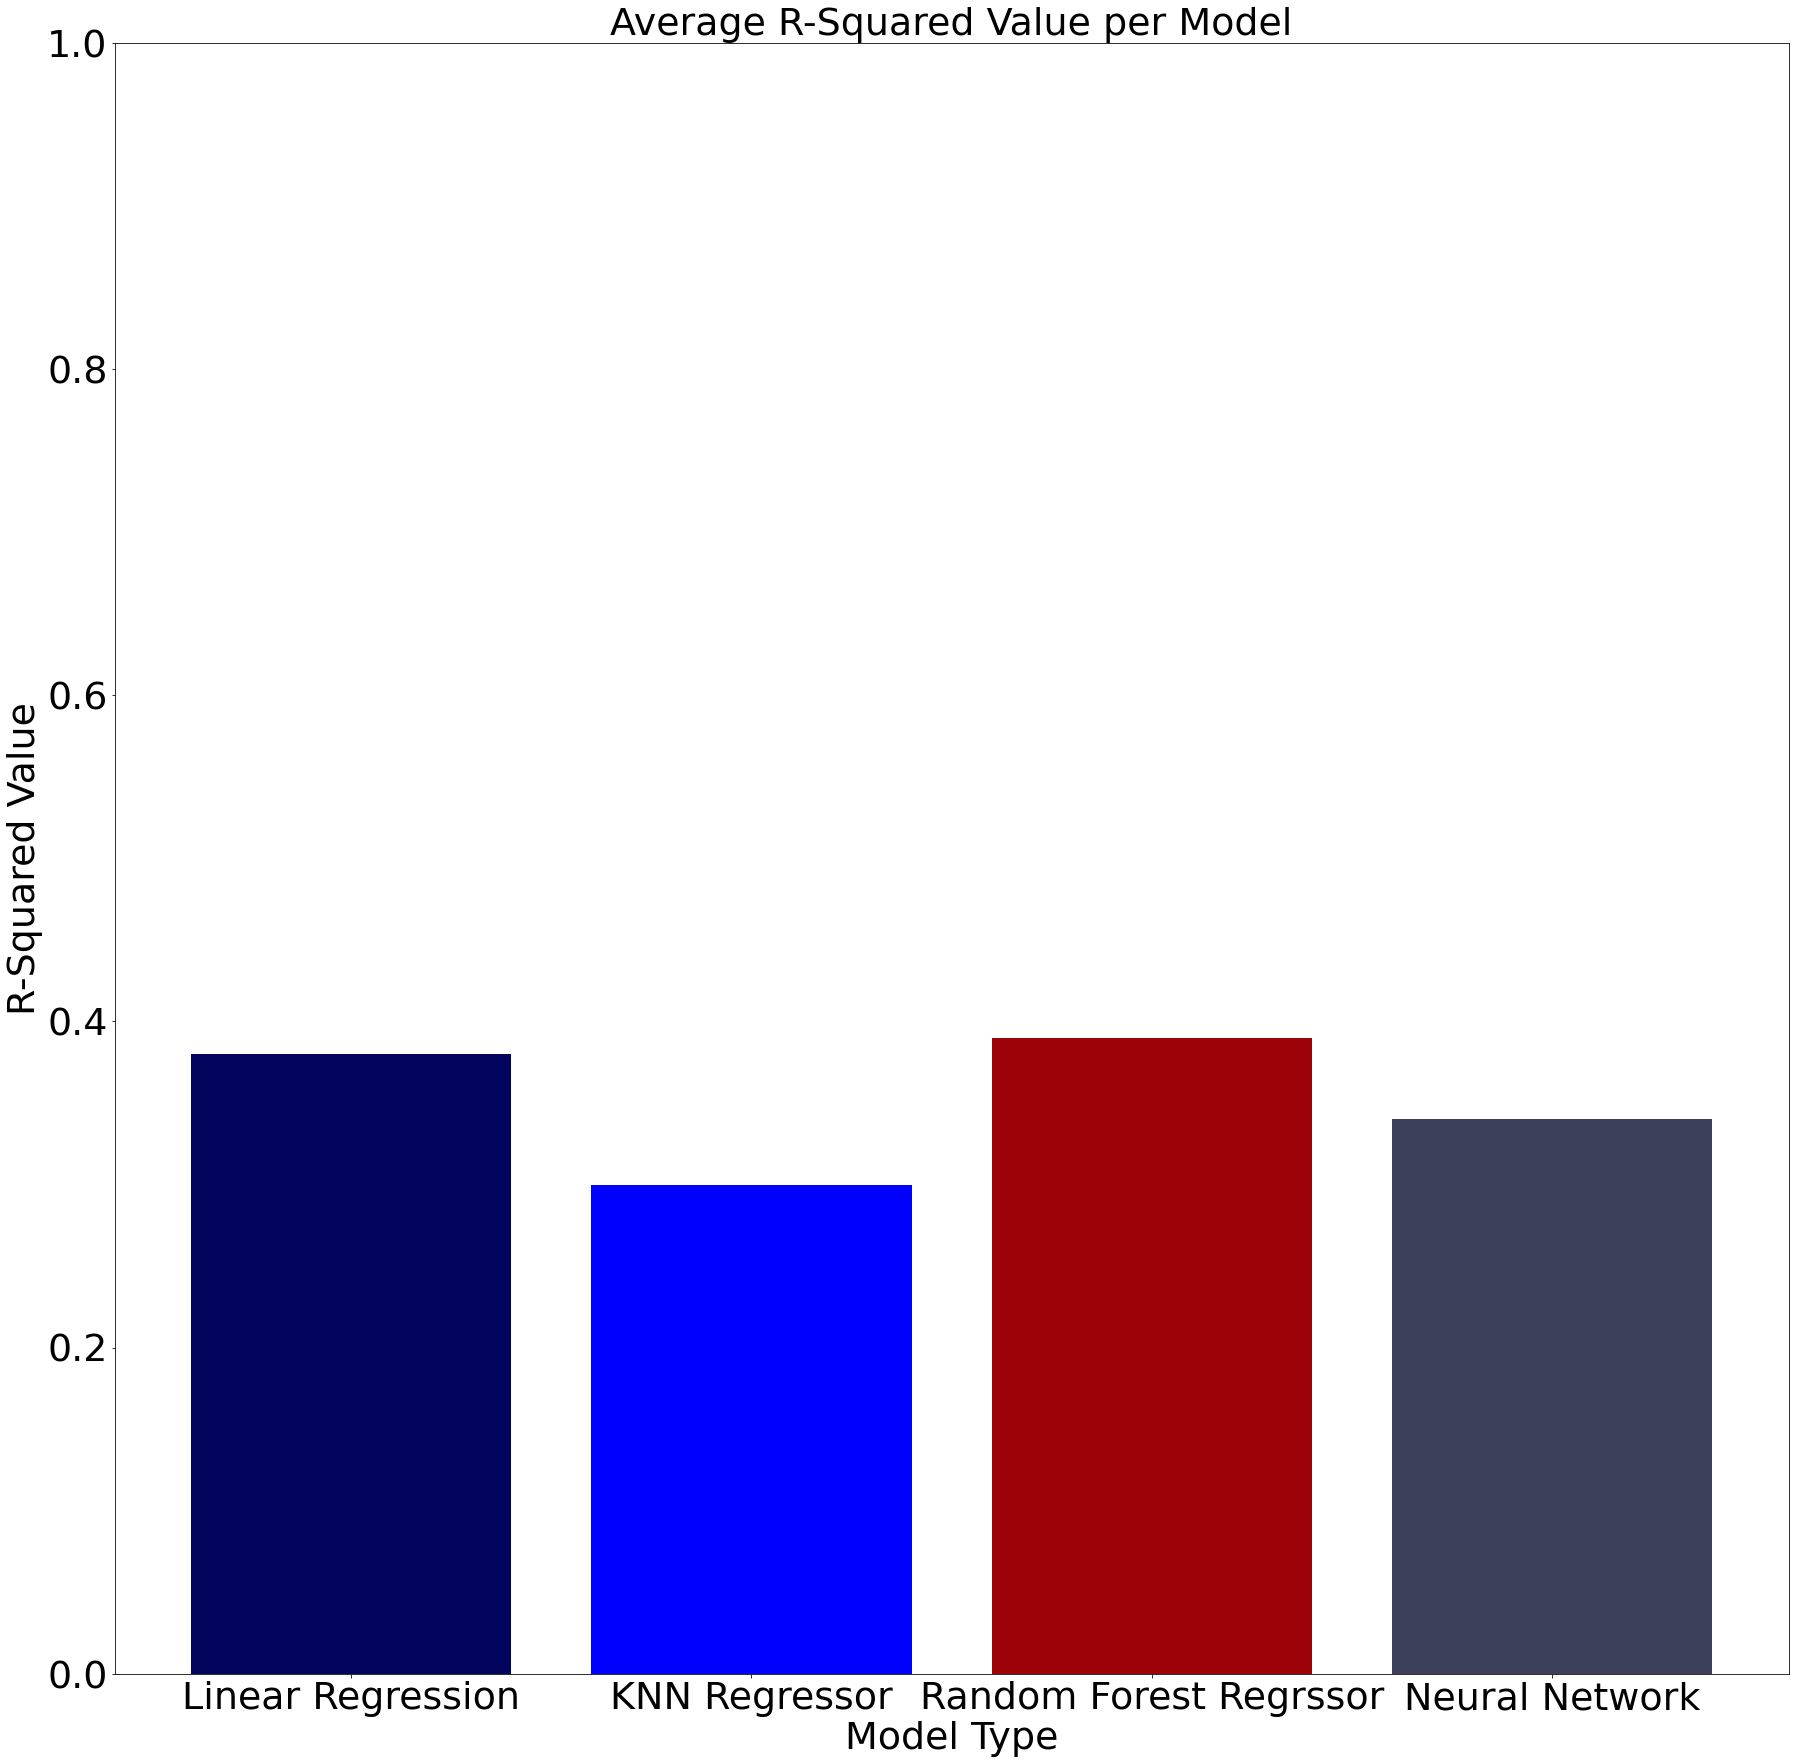

In [12]:
fig, ax = plt.subplots(figsize=((30,30)))
plt.xlabel("Model Type",fontsize=38)
plt.ylabel("R-Squared Value",fontsize=38)
plt.tick_params(axis="both",labelsize=38)
plt.title("Average R-Squared Value per Model",fontsize=38)
# plt.legend()
plt.ylim(0, 1) 
plt.bar(models["bin_name"],models["count"],color=["#03045e","blue","#9d0208","#3d405b","#370617","#1a535c","#1a535c"]);
plt.savefig("../../Reports/Figures/model_values",transparent=True,bbox_inches="tight",pad_inches=.2)

In [13]:
modelavg_predictions=pd.DataFrame([
    {"bin_name":"Average Actual","count":86708.29873633395},
    {"bin_name":"Average Predicted","count":86634.44640730703}
])

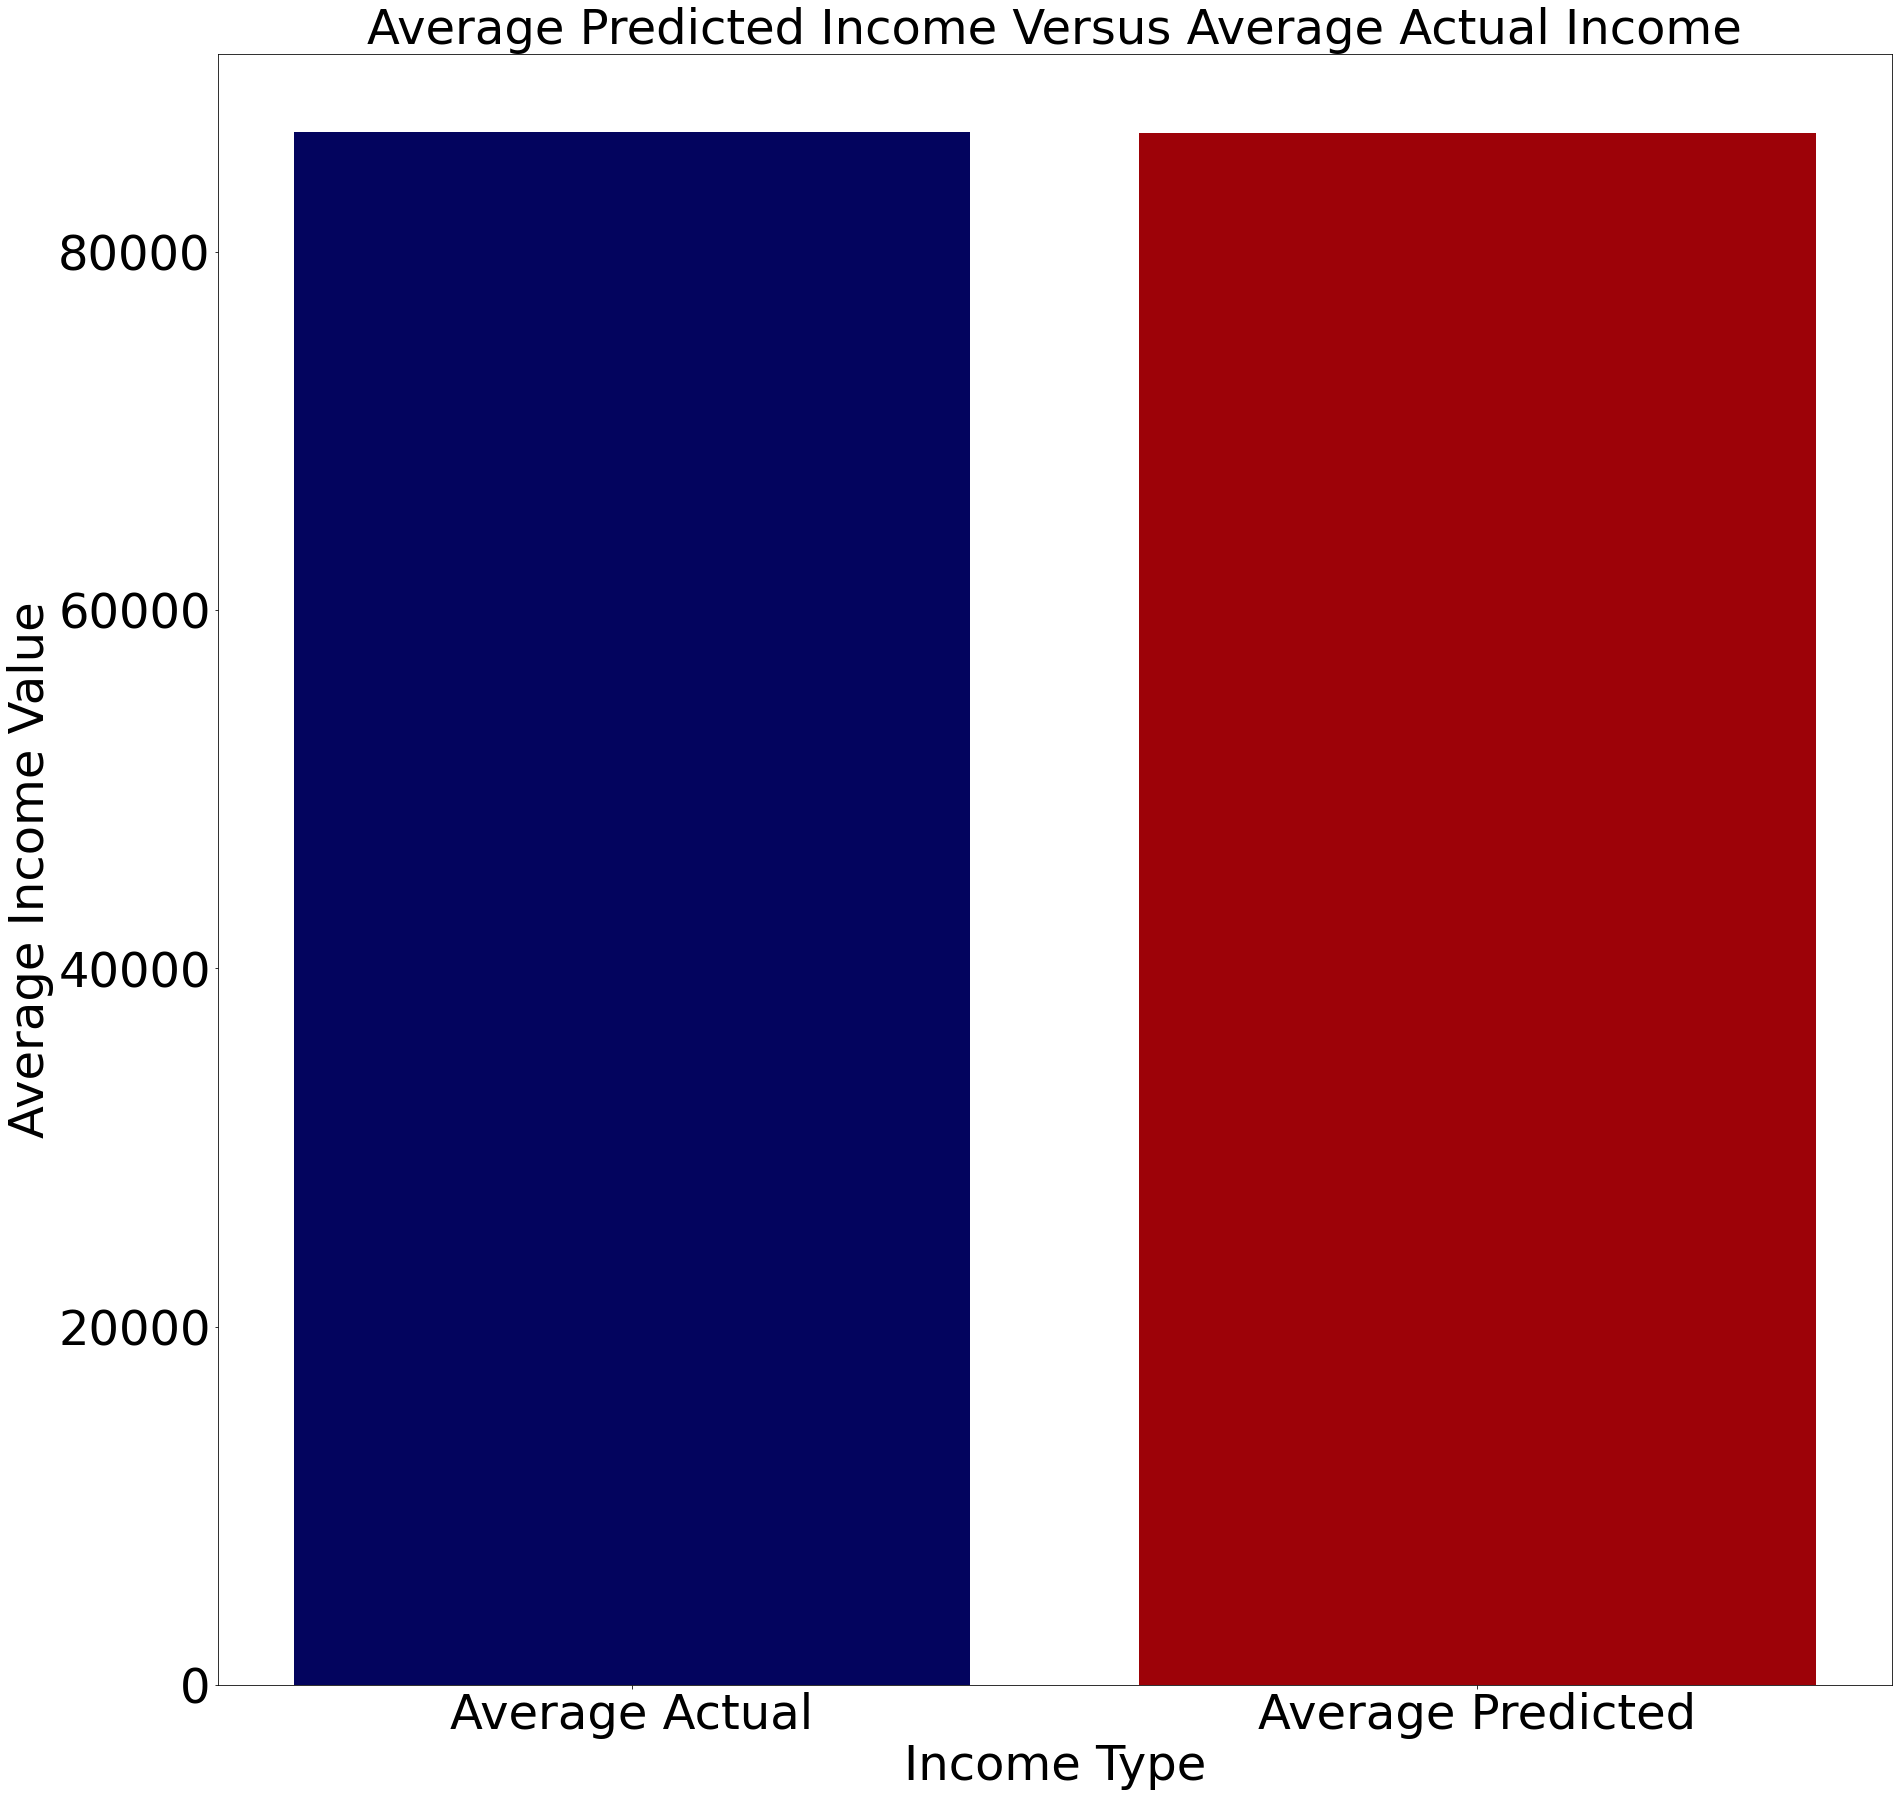

In [14]:
fig, ax = plt.subplots(figsize=((30,30)))
plt.xlabel("Income Type",fontsize=48)
plt.ylabel("Average Income Value",fontsize=48)
plt.tick_params(axis="both",labelsize=48)
plt.title("Average Predicted Income Versus Average Actual Income",fontsize=48)
# plt.legend()
plt.bar(modelavg_predictions["bin_name"],modelavg_predictions["count"],color=["#03045e","#9d0208","#3d405b","#370617","#1a535c","#1a535c"]);
plt.savefig("../../Reports/Figures/modelavg_values",transparent=True,bbox_inches="tight",pad_inches=.2)

In [15]:
model_predictions=pd.DataFrame([
    {"bin_name":"Actual","count":35000.0},
    {"bin_name":"Predicted","count":64088.77956877114}
])

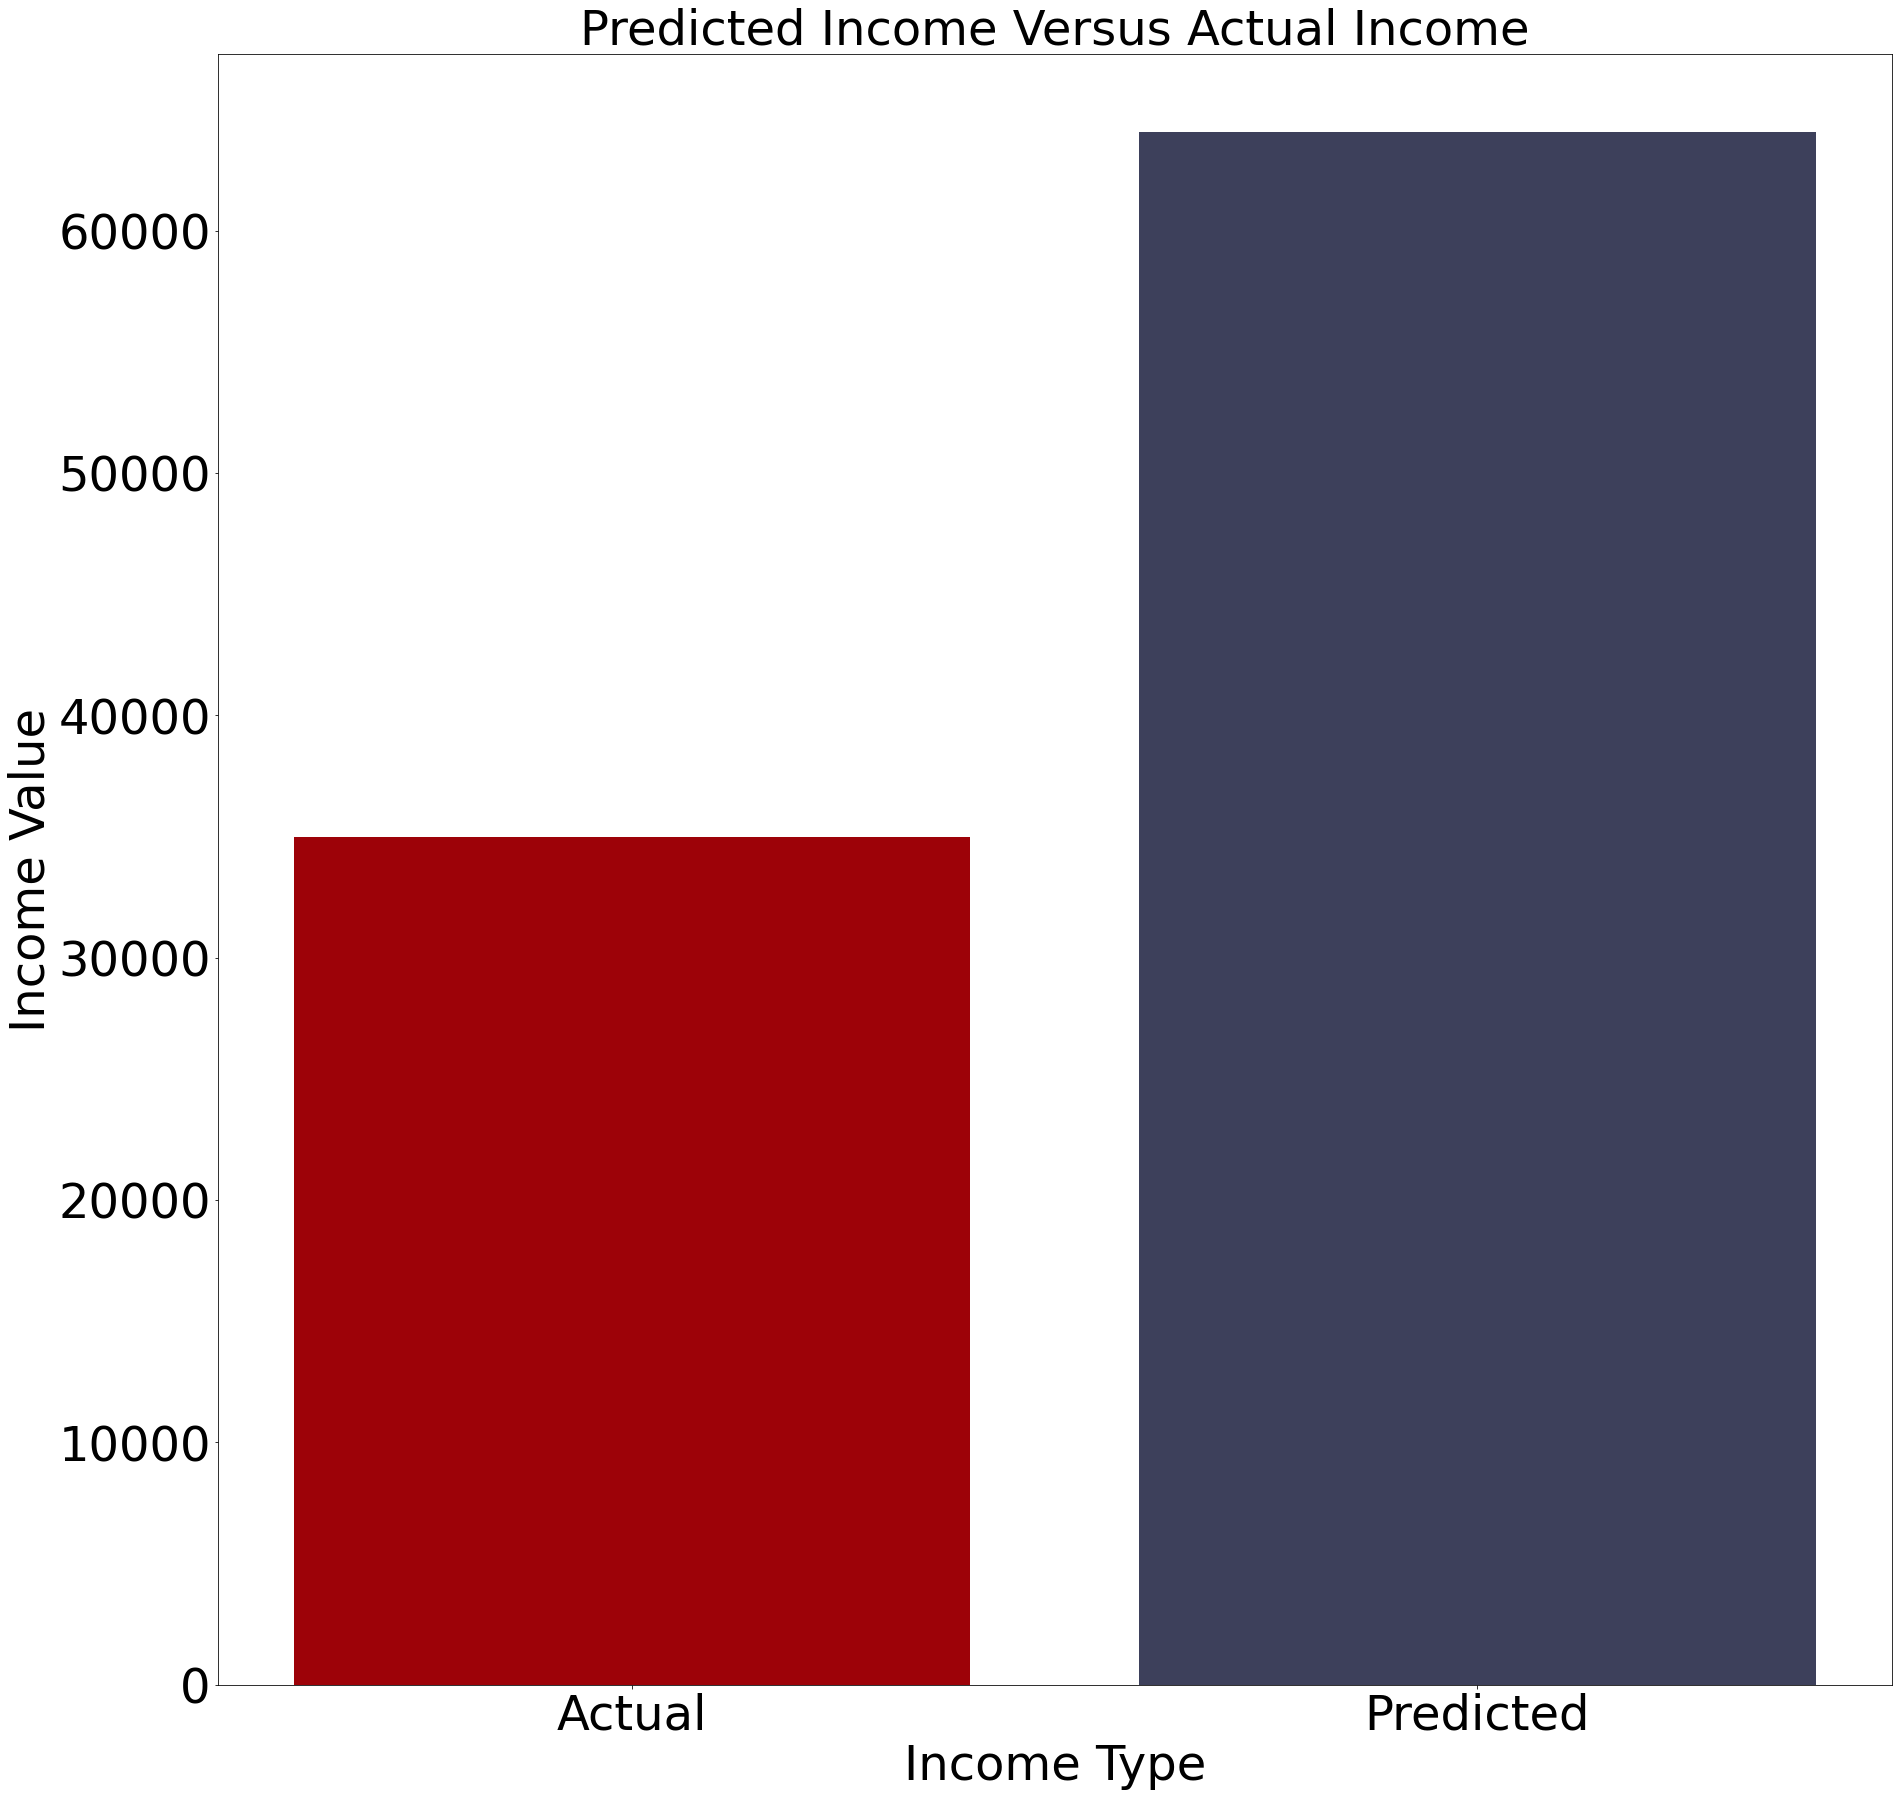

In [16]:
fig, ax = plt.subplots(figsize=((30,30)))
plt.xlabel("Income Type",fontsize=48)
plt.ylabel("Income Value",fontsize=48)
plt.tick_params(axis="both",labelsize=48)
plt.title("Predicted Income Versus Actual Income",fontsize=48)
# plt.legend()
plt.bar(model_predictions["bin_name"],model_predictions["count"],color=["#9d0208","#3d405b","#370617","#1a535c","#1a535c"]);
plt.savefig("../../Reports/Figures/model_predictions",transparent=True,bbox_inches="tight",pad_inches=.2)

In [17]:
import geopandas as gpd

ImportError: DLL load failed while importing _datadir: The specified module could not be found.

In [ ]:
il_1=gpd.read_file("../../Data/tl_2016_17_cousub/tl_2016_17_cousub.shp")

In [ ]:
il_1

In [ ]:
il_1.info()

In [ ]:
il_1.plot()

In [ ]:
num="17-state 17-state33-5567"

In [18]:
len(num)

NameError: name 'num' is not defined

In [19]:
il_2=gpd.read_file("../../Data/tl_2018_17_puma10/tl_2018_17_puma10.shp")

NameError: name 'gpd' is not defined

In [20]:
pd.options.display.max_rows = 88

In [21]:
il_2

NameError: name 'il_2' is not defined

using this map bc it sinks up with the data from the census for the cook countrt south central

In [26]:
il_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   88 non-null     object  
 1   PUMACE10    88 non-null     object  
 2   GEOID10     88 non-null     object  
 3   NAMELSAD10  88 non-null     object  
 4   MTFCC10     88 non-null     object  
 5   FUNCSTAT10  88 non-null     object  
 6   ALAND10     88 non-null     int64   
 7   AWATER10    88 non-null     int64   
 8   INTPTLAT10  88 non-null     object  
 9   INTPTLON10  88 non-null     object  
 10  geometry    88 non-null     geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 7.7+ KB


<AxesSubplot:>

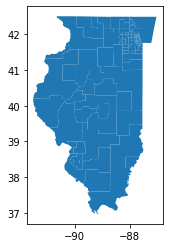

In [27]:
il_2.plot()

Looking at some maps to make the visual for the slides.

In [28]:
number=[1700104,
1700105,
1700202,
1700300,
1700401,
1700501,
1700600,
1700700,
1700800,
1700900,
1701001,
1701104,
1701105,
1701204,
1701205,
1701300,
1701500,
1701602,
1701701,
1701900,
1702000,
1702100,
1702200,
1702300,
1702400,
1702501,
1702601,
1702700,
1702801,
1702901,
1703005,
1703007,
1703008,
1703009,
1703102,
1703105,
1703106,
1703107,
1703108,
1703202,
1703203,
1703204,
1703205,
1703207,
1703208,
1703209,
1703306,
1703307,
1703308,
1703309,
1703310,
1703401,
1703407,
1703408,
1703409,
1703410,
1703411,
1703412,
1703413,
1703414,
1703415,
1703416,
1703417,
1703419,
1703420,
1703421,
1703422,
1703501,
1703502,
1703503,
1703504,
1703520,
1703521,
1703522,
1703523,
1703524,
1703525,
1703526,
1703527,
1703528,
1703529,
1703530,
1703531,
1703532,
1703601,
1703602,
1703700,
1703418]

In [29]:
 location_name=['Jo Daviess, Carroll, Whiteside & Lee Counties PUMA', 
'Rock Island County PUMA', 
'Henry, Mercer, Henderson, Warren, Hancock, McDonough & Fulton Counties PUMA', 

'Adams, Pike, Brown, Schuyler & Mason Counties PUMA',

'Cass, Morgan, Scott, Greene, Macoupin, Jersey & Calhoun Counties PUMA',

'Montgomery, Bond, Clinton, Fayette & Effingham Counties PUMA',

'Douglas, Edgar, Coles & Cumberland Counties PUMA',

'Clark, Jasper, Crawford, Lawrence, Richland, Clay & Wayne Counties PUMA',

'South & Southeast Illinois PUMA',

'Jackson, Williamson, Franklin & Perry Counties PUMA',

'Monroe, Randolph, Washington, Jefferson & Marion Counties PUMA',

'St. Clair County (Central & Northeast) PUMA',

'St. Clair County (Northwest, Southwest & Southeast) PUMA',

'Madison County (East) PUMA',

'Madison County (West)Granite City, Alton, Wood River Cities & Godfrey Village PUMA',

'Sangamon CountySpringfield City PUMA',

'Macon CountyDecatur City PUMA',

'Menard, Logan, De Witt, Piatt, Moultrie, Shelby & Christian Counties PUMA',

'Peoria CountyPeoria City PUMA',

'Tazewell County PUMA',

'McLean County PUMA',

'Champaign CountyChampaign & Urbana Cities PUMA',

'Livingston, Ford, Iroquois & Vermilion Counties PUMA',

'Kankakee County PUMA',

'LaSalle County PUMA',

'Knox, Stark, Bureau, Marshall & Woodford Counties PUMA',

'DeKalb County PUMA',

'Stephenson & Ogle Counties PUMA',

'Winnebago County (Southeast & West)Rockford City PUMA',

'Winnebago (Northeast) & Boone Counties PUMA',

'Kane County (Southeast)Aurora Township PUMA',

'Kane County (East)St. Charles, Batavia (Central) & Geneva (Central) Townships PUMA',

'Kane County (Northeast)Elgin (North & Central) & Dundee Townships PUMA',

'Kane County (West) PUMA',

'Will County (West Central)Joliet & Troy Townships PUMA',

'Will County (Northwest Central)Plainfield & Lockport Townships PUMA',

'Will County (Northwest)DuPage & Wheatland Townships PUMA',

'Will County (Northeast)Frankfort, Homer & New Lenox (North) Townships PUMA',

'Will County (South) PUMA',

'DuPage County (Central)Milton Township PUMA',

'DuPage County (South Central)Lisle Township PUMA',

'DuPage County (Southeast)Downers Grove Township PUMA',

'DuPage County (East Central)York Township PUMA',

'Dupage County (Northeast)Addison & Bloomingdale (North) Townships PUMA',

'DuPage County (Northwest)Bloomingdale (South), Wayne & Winfield (North) Townships PUMA',

'DuPage County (Southwest)Naperville & Winfield (South) Townships PUMA',

'Lake County (Northwest)Avon, Lake Villa, Antioch & Grant Townships PUMA',

'Lake County (Northeast)Waukegan, Zion, Benton & Newport Townships PUMA',

'Lake County (Southwest)Ela, Freemont, Wauconda & Cuba Townships PUMA',

'Lake County (East Central)Warren, Libertyville (North & East) & Shields Townships PUMA',

'Lake CountyVernon, Moraine, West Deerfield & Libertyville (Southeast) Townships PUMA',

'Cook County (Northwest)Palatine & Barrington Townships PUMA',

'Cook County (West Central)Proviso, Riverside & River Forest Townships PUMA',

'Cook County (Central)Cicero, Berwyn & Oak Park Townships PUMA',

'Cook County (West Central)Lyons & Stickney Townships PUMA',

'Cook County (Southwest)Orland (West & Central), Palos & Lemont Townships PUMA',

'Cook County (South Central)Worth & Calumet Townships PUMA',

'Cook County (South Central)Bremen & Orland (East) Townships PUMA',

'Cook County (Southeast)Thornton Township PUMA',

'Cook County (South)Bloom & Rich Townships PUMA',

'Cook County (North)Wheeling Township (North & East) PUMA',

'Cook County (Northeast)Northfield & New Trier Townships PUMA',

'Cook County (Northwest)Hanover & Schaumburg (Northwest) Townships PUMA',

'Cook County (Northwest)Elk Grove & Wheeling (Southwest) Townships PUMA',

'Cook County (North)Maine, Norwood Park Townships & Chicago CityEdison Park PUMA',

'Cook County (North)Niles & Evanston Townships PUMA',

'Cook County (West)Leyden, Norwood Park (South) Townships & Chicago City OHare PUMA',

'Chicago City (North)Edgewater, Uptown & Rogers Park PUMA',

'Chicago City (North)Lake View & Lincoln Park PUMA',

'Chicago City (North)West Ridge, Lincoln Square & North Center PUMA',

'Chicago City (Northwest)Irving Park, Albany Park, Forest Glen & North Park PUMA',

'Chicago City (Northwest)Portage Park, Dunning & Jefferson Park PUMA',

'Chicago City (West)Austin, Belmont Cragin & Montclare PUMA',

'Chicago City (Northwest)Logan Square, Avondale & Hermosa PUMA',

'Chicago City (West)North & South Lawndale, Humboldt Park, East & West Garfield Park PUMA',

'Chicago City (West)West Town, Near West Side & Lower West Side PUMA',

'Chicago City (Central)Near North Side, Loop & Near South Side PUMA',

'Chicago City (Southwest)Brighton Park, New City, Bridgeport & McKinley Park PUMA',

'Chicago City (Southwest)Gage Park, Garfield Ridge & West Lawn PUMA',

'Chicago City (South)Chicago Lawn, Englewood/West Englewood & Greater Grand Crossing PUMA',

'Chicago City (South)South Shore, Hyde Park, Woodlawn, Grand Boulevard & Douglas PUMA',

'Chicago City (South)Ashburn, Washington Heights, Morgan Park & Beverly PUMA',

'Chicago City (South)Auburn Gresham, Roseland, Chatham, Avalon Park & Burnside PUMA',

'Chicago City (South)South Chicago, Pullman, West Pullman, East Side & South Deering PUMA', 

'McHenry County (North, West & Central) PUMA',

'McHenry County (Southeast)Algonquin, McHenry & Nunda Townships PUMA',

'Kendall & Grundy Counties PUMA',
'Cook County (Northwest)--Schaumburg Township (South & Central) PUMA']

In [30]:
type(number)


list

In [31]:
type(location_name)

list

In [32]:
number_df=pd.DataFrame(number)

In [38]:
number_df

,0
0,1700104
1,1700105
2,1700202
3,1700300
4,1700401
5,1700501
6,1700600
7,1700700
8,1700800
9,1700900


In [39]:
loc_df=pd.DataFrame(location_name)

In [40]:
loc_df

,0
0,"Jo Daviess, Carroll, Whiteside & Lee Counties ..."
1,Rock Island County PUMA
2,"Henry, Mercer, Henderson, Warren, Hancock, McD..."
3,"Adams, Pike, Brown, Schuyler & Mason Counties ..."
4,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ..."
5,"Montgomery, Bond, Clinton, Fayette & Effingham..."
6,"Douglas, Edgar, Coles & Cumberland Counties PUMA"
7,"Clark, Jasper, Crawford, Lawrence, Richland, C..."
8,South & Southeast Illinois PUMA
9,"Jackson, Williamson, Franklin & Perry Counties..."


In [41]:
joined_df=number_df.merge(loc_df, how="inner",left_index=True,right_index=True)

In [42]:
joined_df

,0_x,0_y
0,1700104,"Jo Daviess, Carroll, Whiteside & Lee Counties ..."
1,1700105,Rock Island County PUMA
2,1700202,"Henry, Mercer, Henderson, Warren, Hancock, McD..."
3,1700300,"Adams, Pike, Brown, Schuyler & Mason Counties ..."
4,1700401,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ..."
5,1700501,"Montgomery, Bond, Clinton, Fayette & Effingham..."
6,1700600,"Douglas, Edgar, Coles & Cumberland Counties PUMA"
7,1700700,"Clark, Jasper, Crawford, Lawrence, Richland, C..."
8,1700800,South & Southeast Illinois PUMA
9,1700900,"Jackson, Williamson, Franklin & Perry Counties..."


In [43]:
locations=pd.DataFrame([
    {"Geocode":number},{"Location_name":location_name}])

In [44]:
locations

,Geocode,Location_name
0,"[1700104, 1700105, 1700202, 1700300, 1700401, ...",NaN
1,NaN,"[Jo Daviess, Carroll, Whiteside & Lee Counties..."


locations=pd.DataFrame([
    {"Geocode":["1700104
1700105
1700202
1700300
1700401
1700501
1700600
1700700
1700800
1700900
1701001
1701104
1701105
1701204
1701205
1701300
1701500
1701602
1701701
1701900
1702000
1702100
1702200
1702300
1702400
1702501
1702601
1702700
1702801
1702901
1703005
1703007
1703008
1703009
1703102
1703105
1703106
1703107
1703108
1703202
1703203
1703204
1703205
1703207
1703208
1703209
1703306
1703307
1703308
1703309
1703310
1703401
1703407
1703408
1703409
1703410
1703411
1703412
1703413
1703414
1703415
1703416
1703417
1703419
1703420
1703421
1703422
1703501
1703502
1703503
1703504
1703520
1703521
1703522
1703523
1703524
1703525
1703526
1703527
1703528
1703529
1703530
1703531
1703532
1703601
1703602
1703700"""]},
    {"Location name":["""Jo Daviess, Carroll, Whiteside & Lee Counties PUMA 
Rock Island County PUMA 
Henry, Mercer, Henderson, Warren, Hancock, McDonough & Fulton Counties PUMA 

Adams, Pike, Brown, Schuyler & Mason Counties PUMA

Cass, Morgan, Scott, Greene, Macoupin, Jersey & Calhoun Counties PUMA

Montgomery, Bond, Clinton, Fayette & Effingham Counties PUMA

Douglas, Edgar, Coles & Cumberland Counties PUMA

Clark, Jasper, Crawford, Lawrence, Richland, Clay & Wayne Counties PUMA

South & Southeast Illinois PUMA

Jackson, Williamson, Franklin & Perry Counties PUMA

Monroe, Randolph, Washington, Jefferson & Marion Counties PUMA

St. Clair County (Central & Northeast) PUMA

St. Clair County (Northwest, Southwest & Southeast) PUMA

Madison County (East) PUMA

Madison County (West)Granite City, Alton, Wood River Cities & Godfrey Village PUMA

Sangamon CountySpringfield City PUMA

Macon CountyDecatur City PUMA

Menard, Logan, De Witt, Piatt, Moultrie, Shelby & Christian Counties PUMA

Peoria CountyPeoria City PUMA

Tazewell County PUMA

McLean County PUMA

Champaign CountyChampaign & Urbana Cities PUMA

Livingston, Ford, Iroquois & Vermilion Counties PUMA

Kankakee County PUMA

LaSalle County PUMA

Knox, Stark, Bureau, Marshall & Woodford Counties PUMA

DeKalb County PUMA

Stephenson & Ogle Counties PUMA

Winnebago County (Southeast & West)Rockford City PUMA

Winnebago (Northeast) & Boone Counties PUMA

Kane County (Southeast)Aurora Township PUMA

Kane County (East)St. Charles, Batavia (Central) & Geneva (Central) Townships PUMA

Kane County (Northeast)Elgin (North & Central) & Dundee Townships PUMA

Kane County (West) PUMA

Will County (West Central)Joliet & Troy Townships PUMA

Will County (Northwest Central)Plainfield & Lockport Townships PUMA

Will County (Northwest)DuPage & Wheatland Townships PUMA

Will County (Northeast)Frankfort, Homer & New Lenox (North) Townships PUMA

Will County (South) PUMA

DuPage County (Central)Milton Township PUMA

DuPage County (South Central)Lisle Township PUMA

DuPage County (Southeast)Downers Grove Township PUMA

DuPage County (East Central)York Township PUMA

Dupage County (Northeast)Addison & Bloomingdale (North) Townships PUMA

DuPage County (Northwest)Bloomingdale (South), Wayne & Winfield (North) Townships PUMA

DuPage County (Southwest)Naperville & Winfield (South) Townships PUMA

Lake County (Northwest)Avon, Lake Villa, Antioch & Grant Townships PUMA

Lake County (Northeast)Waukegan, Zion, Benton & Newport Townships PUMA

Lake County (Southwest)Ela, Freemont, Wauconda & Cuba Townships PUMA

Lake County (East Central)Warren, Libertyville (North & East) & Shields Townships PUMA

Lake CountyVernon, Moraine, West Deerfield & Libertyville (Southeast) Townships PUMA

Cook County (Northwest)Palatine & Barrington Townships PUMA

Cook County (West Central)Proviso, Riverside & River Forest Townships PUMA

Cook County (Central)Cicero, Berwyn & Oak Park Townships PUMA

Cook County (West Central)Lyons & Stickney Townships PUMA

Cook County (Southwest)Orland (West & Central), Palos & Lemont Townships PUMA

Cook County (South Central)Worth & Calumet Townships PUMA

Cook County (South Central)Bremen & Orland (East) Townships PUMA

Cook County (Southeast)Thornton Township PUMA

Cook County (South)Bloom & Rich Townships PUMA

Cook County (North)Wheeling Township (North & East) PUMA

Cook County (Northeast)Northfield & New Trier Townships PUMA

Cook County (Northwest)Hanover & Schaumburg (Northwest) Townships PUMA

1703418Cook County (Northwest)Schaumburg Township (South & Central) PUMA

Cook County (Northwest)Elk Grove & Wheeling (Southwest) Townships PUMA

Cook County (North)Maine, Norwood Park Townships & Chicago CityEdison Park PUMA

Cook County (North)Niles & Evanston Townships PUMA

Cook County (West)Leyden, Norwood Park (South) Townships & Chicago CityO'Hare PUMA

Chicago City (North)Edgewater, Uptown & Rogers Park PUMA

Chicago City (North)Lake View & Lincoln Park PUMA

Chicago City (North)West Ridge, Lincoln Square & North Center PUMA

Chicago City (Northwest)Irving Park, Albany Park, Forest Glen & North Park PUMA

Chicago City (Northwest)Portage Park, Dunning & Jefferson Park PUMA

Chicago City (West)Austin, Belmont Cragin & Montclare PUMA

Chicago City (Northwest)Logan Square, Avondale & Hermosa PUMA

Chicago City (West)North & South Lawndale, Humboldt Park, East & West Garfield Park PUMA

Chicago City (West)West Town, Near West Side & Lower West Side PUMA

Chicago City (Central)Near North Side, Loop & Near South Side PUMA

Chicago City (Southwest)Brighton Park, New City, Bridgeport & McKinley Park PUMA

Chicago City (Southwest)Gage Park, Garfield Ridge & West Lawn PUMA

Chicago City (South)Chicago Lawn, Englewood/West Englewood & Greater Grand Crossing PUMA

Chicago City (South)South Shore, Hyde Park, Woodlawn, Grand Boulevard & Douglas PUMA

Chicago City (South)Ashburn, Washington Heights, Morgan Park & Beverly PUMA

Chicago City (South)Auburn Gresham, Roseland, Chatham, Avalon Park & Burnside PUMA

Chicago City (South)South Chicago, Pullman, West Pullman, East Side & South Deering 

McHenry County (North, West & Central) PUMA

McHenry County (Southeast)Algonquin, McHenry & Nunda Townships PUMA1

Kendall & Grundy Counties PUMA"""]}  
])

In [45]:
joined_df.rename(columns={"0_x": "GEOID10", "0_y": "County_names"},inplace=True)

In [46]:
joined_df

,GEOID10,County_names
0,1700104,"Jo Daviess, Carroll, Whiteside & Lee Counties ..."
1,1700105,Rock Island County PUMA
2,1700202,"Henry, Mercer, Henderson, Warren, Hancock, McD..."
3,1700300,"Adams, Pike, Brown, Schuyler & Mason Counties ..."
4,1700401,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ..."
5,1700501,"Montgomery, Bond, Clinton, Fayette & Effingham..."
6,1700600,"Douglas, Edgar, Coles & Cumberland Counties PUMA"
7,1700700,"Clark, Jasper, Crawford, Lawrence, Richland, C..."
8,1700800,South & Southeast Illinois PUMA
9,1700900,"Jackson, Williamson, Franklin & Perry Counties..."


In [47]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GEOID10       88 non-null     int64 
 1   County_names  88 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [48]:
il_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   88 non-null     object  
 1   PUMACE10    88 non-null     object  
 2   GEOID10     88 non-null     object  
 3   NAMELSAD10  88 non-null     object  
 4   MTFCC10     88 non-null     object  
 5   FUNCSTAT10  88 non-null     object  
 6   ALAND10     88 non-null     int64   
 7   AWATER10    88 non-null     int64   
 8   INTPTLAT10  88 non-null     object  
 9   INTPTLON10  88 non-null     object  
 10  geometry    88 non-null     geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 7.7+ KB


In [49]:
joined_df.GEOID10=joined_df.GEOID10.astype(str)

In [50]:
full_df=il_2.merge(joined_df, how="inner", on="GEOID10")

In [51]:
full_df

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,County_names
0,17,03411,1703411,Cook County (South Central)--Worth & Calumet T...,G6120,S,94129155,1576803,+41.7313634,-087.7167725,"POLYGON ((-87.72144 41.73486, -87.72142 41.734...",Cook County (South Central)Worth & Calumet Tow...
1,17,03107,1703107,"Will County (Northeast)--Frankfort, Homer & Ne...",G6120,S,243596923,478565,+41.5528956,-087.9168232,"POLYGON ((-87.86079 41.55752, -87.85730 41.557...","Will County (Northeast)Frankfort, Homer & New ..."
2,17,03700,1703700,Kendall & Grundy Counties PUMA,G6120,S,1912412909,37262592,+41.4200983,-088.4339373,"POLYGON ((-88.26810 41.72454, -88.26195 41.724...",Kendall & Grundy Counties PUMA
3,17,02000,1702000,McLean County PUMA,G6120,S,3064559693,7853695,+40.4945594,-088.8445391,"POLYGON ((-88.92933 40.75334, -88.92618 40.753...",McLean County PUMA
4,17,01602,1701602,"Menard, Logan, De Witt, Piatt, Moultrie, Shelb...",G6120,S,9254202416,88234698,+39.7699432,-089.2258108,"POLYGON ((-88.49425 39.21500, -88.49929 39.215...","Menard, Logan, De Witt, Piatt, Moultrie, Shelb..."
5,17,02400,1702400,LaSalle County PUMA,G6120,S,2940114208,33701591,+41.3433407,-088.8859312,"POLYGON ((-88.83772 41.63096, -88.83096 41.631...",LaSalle County PUMA
6,17,03007,1703007,"Kane County (East)--St. Charles, Batavia (Cent...",G6120,S,165532940,4484435,+41.9135360,-088.3119120,"POLYGON ((-88.29447 41.99736, -88.29296 42.000...","Kane County (East)St. Charles, Batavia (Centra..."
7,17,02700,1702700,Stephenson & Ogle Counties PUMA,G6120,S,3426930684,12775251,+42.1785230,-089.4642430,"POLYGON ((-89.33719 42.20237, -89.33631 42.202...",Stephenson & Ogle Counties PUMA
8,17,02801,1702801,Winnebago County (Southeast & West)--Rockford ...,G6120,S,966810320,8223799,+42.3082349,-089.1981973,"POLYGON ((-89.07113 42.32473, -89.07007 42.325...",Winnebago County (Southeast & West)Rockford Ci...
9,17,02901,1702901,Winnebago (Northeast) & Boone Counties PUMA,G6120,S,1089604090,10593854,+42.3513497,-088.9034299,"POLYGON ((-88.82502 42.49251, -88.82336 42.492...",Winnebago (Northeast) & Boone Counties PUMA


In [1]:
full_df.to_csv("../../Data/geo_Df.csv",index=False)

NameError: name 'full_df' is not defined

203 counties toal but df has 87

<AxesSubplot:>

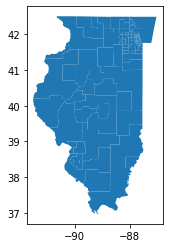

In [65]:
full_df.plot()

In [66]:
import contextily as ctx

<AxesSubplot:>

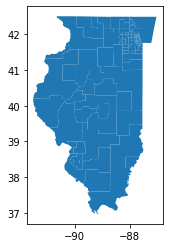

In [54]:
il_2.plot()

C:\Users\Ice\Anaconda3\envs\geopandas\lib\site-packages\contextily\tile.py:629: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


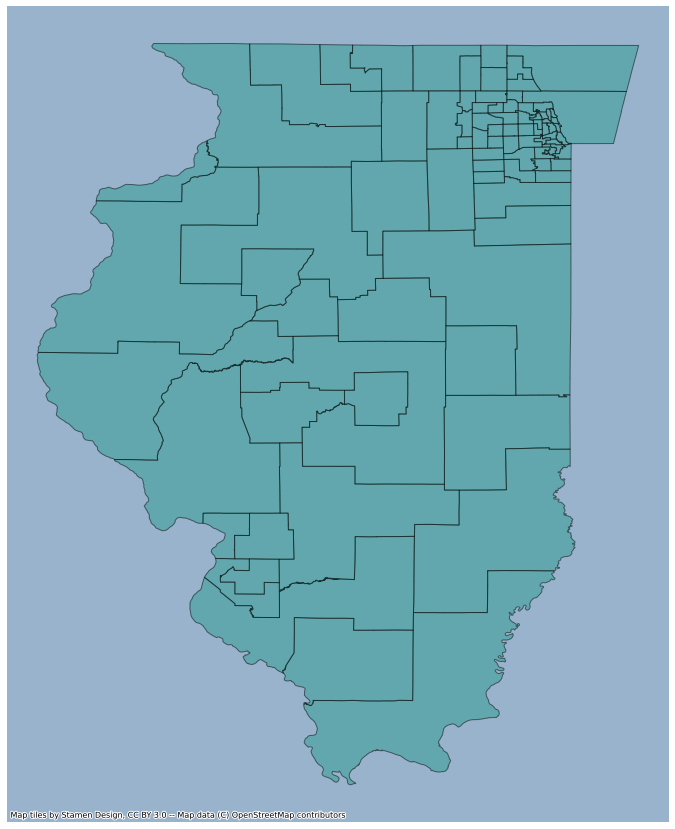

In [55]:
il_3=il_2.to_crs(epsg=3857)
figure, ax = plt.subplots(figsize=(15,15))
il_2.plot(alpha=0.5, edgecolor='k', color='#2a9d8f', ax=ax)
ax.set_axis_off()
ctx.add_basemap(ax)
plt.savefig("../../Reports/Figures/Map",transparent=True,bbox_inches="tight");

<ipython-input-56-6afd680a7922>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
C:\Users\Ice\Anaconda3\envs\geopandas\lib\site-packages\contextily\tile.py:629: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


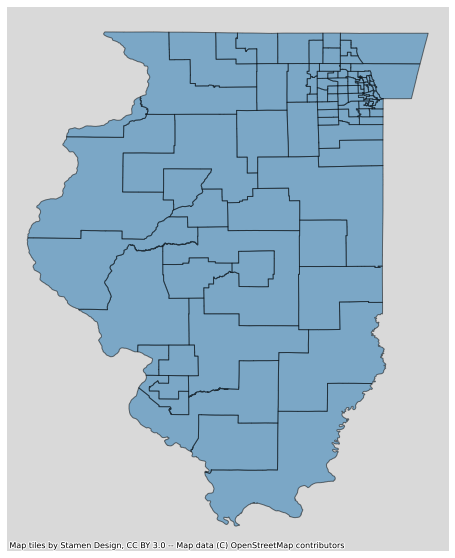

In [56]:
ax =full_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

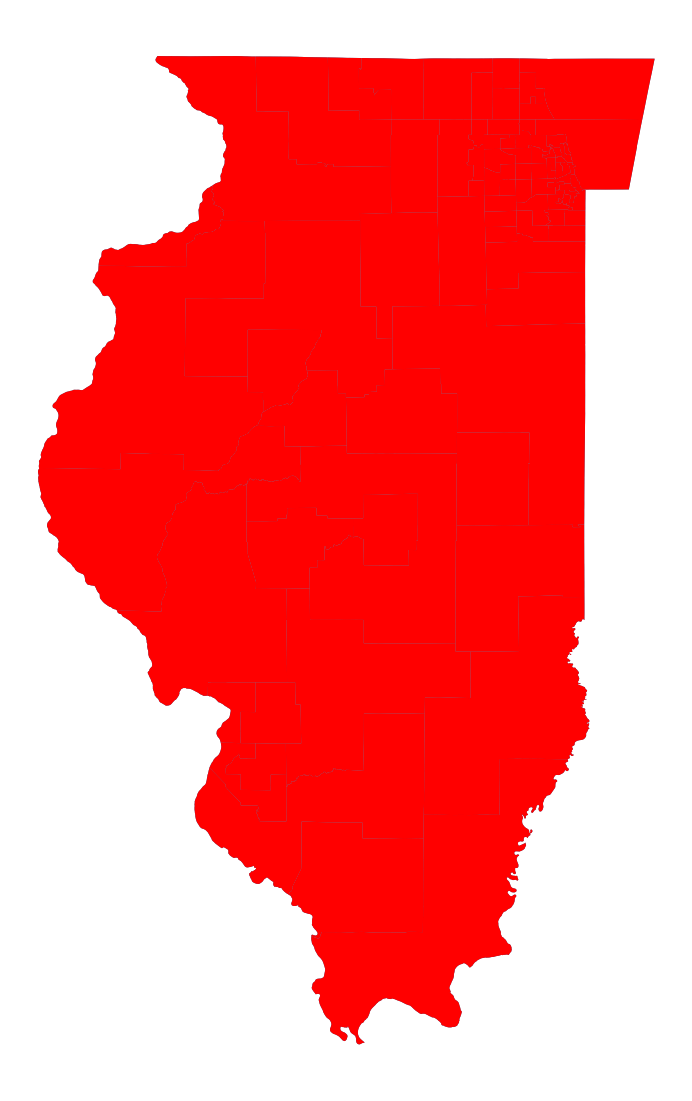

In [57]:
fig, ax = plt.subplots(1,1,figsize =(20,20))
full_df.plot(ax=ax)
ax.set_axis_off()
il_2.plot(ax=ax, facecolor='red');

<AxesSubplot:>

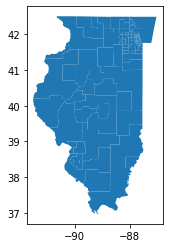

In [58]:
full_df.plot()

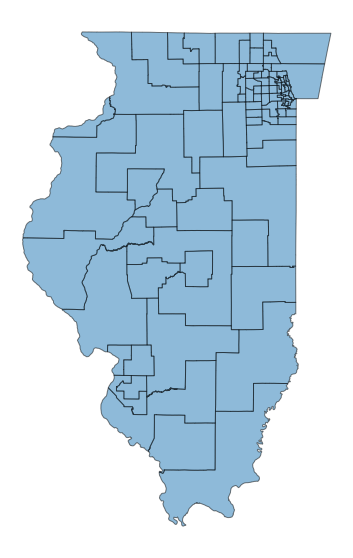

In [59]:
ax =full_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.savefig("../../Reports/Figures/map2",transparent=True,bbox_inches="tight",)
